In [11]:
# pip install yfinance
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, timezone
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TextClassificationPipeline
import yfinance as yf
from google.colab import files
import matplotlib.pyplot as plt
from transformers import pipeline
import unicodedata, re


# 1. Awareness & Consideration (Google Trends)
### For Top Banks
Looks at google trends data to find the awareness score. For the basic score it is looking at the popularity of searching TD bank into Google vs top banks like Bank of America, Citibank, Captial One, and Chase. For the regional bank score it looks like regional banks like Truist, Citizen, PNC, and

In [ ]:
date_list = []
awareness_list = []

In [ ]:
#All of these google trends datasets from Sept 28 to Nov 30 are in the csv "awareness_top_sept_28_nov_30"
#these are the file names of the past individual weeks google trends data
#`trendle-469110.brand_health_data.trends_data_26 Oct - 28 Sept`
#`trendle-469110.brand_health_data.trends_data_28 Sept - 31 Aug`
#`trendle-469110.brand_health_data.trends_data_5 Oct - 7 Sept`
#`trendle-469110.brand_health_data.trends_data_12 Oct - 14 Sept`
#`trendle-469110.brand_health_data.trends_data_19 Oct - 21 Sept`
#`trendle-469110.brand_health_data.trends_data_26 Oct - 28 Sept`
#`trendle-469110.brand_health_data.trends_data_2 Nov - 5 Oct`
#`trendle-469110.brand_health_data.trends_data_9 Nov - 10 Oct`
#`trendle-469110.brand_health_data.trends_data_16 Nov - 19 Oct`
#`trendle-469110.brand_health_data.trends_data_23 Nov - 26 Oct`
#`trendle-469110.brand_health_data.trends_data_30 Nov - 2 Nov`
#`trendle-469110.brand_health_data.trends_data_7 Dec - 9 Nov`


## If you have a past awareness file of dates and weekly scores
### Read in past awareness scores for Top Banks(csv)
If you have a csv of past awareness scores, upload and type the file name here and run the cell below
Otherwise skip these two cells
### Please uncomment all """%%bigquery...""" code if you are using Bigquery to read in datasets, otherwise use Pandas or your preferred way to read in a dataset and save a dataset

In [ ]:
"""
%%bigquery past_trends --project trendle-469110
SELECT * FROM `trendle-469110.brand_health_data.awareness_top_Sep 28_Nov 30`
"""

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
date_list = past_trends['date'].tolist()
awareness_list = past_trends['awareness'].tolist()

## IF You have a New Google Trends Awareness File
### Read in a single awareness Google Trends file (csv) for Top Banks
If you have a new google trends file for the top banks, input the file name and run the files below.
If you have multiple new files you want to add to the awareness dataset then put the file name in, run the next 2 cells (before you make it a dataframe), and then repeat those same two cells just with a differnt file name each time. Once all the new files are processed, run that following line that makes all the data into a new CSV

In [ ]:
#uncomment if use bigquery
"""
%%bigquery trends --project trendle-469110
SELECT * FROM `trendle-469110.brand_health_data.trends_data_7 Dec - 9 Nov`
"""

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
trends = trends[2:-1]
trends = trends.reset_index(drop = True)
trends = trends.rename(columns = {'string_field_0': 'date', 'string_field_1': 'TD Bank', 'string_field_2': 'Chase Bank', 'string_field_3': 'Capital One Bank', 'string_field_4': 'Bank of America', 'string_field_5': 'Citibank'})
trends['Other Average'] = trends.iloc[:, 2:].astype(int).mean(axis = 1)
trends['Daily Average'] = 100*(trends['TD Bank'].astype(int)/trends['Other Average'])
awareness_score = trends['Daily Average'].mean()
print(awareness_score)
date = datetime.strptime(max(trends['date']), "%Y-%m-%d")
date = date.strftime("%Y-%m-%d")
date_list.append(date)
awareness_list.append(awareness_score)

19.752419152275888


### Repeat these previous 2 cells if you have another new Google Trends file
## Once all new data is added, run the cell below

In [ ]:
awareness = pd.DataFrame({'date': date_list, 'awareness':awareness_list})
awareness

,date,awareness
0,2025-09-28,20.566941
1,2025-10-05,20.101510
2,2025-10-12,20.140423
3,2025-10-19,20.268016
4,2025-10-26,20.591342
5,2025-11-02,20.403350
6,2025-11-09,20.591634
7,2025-11-16,20.532384
8,2025-11-23,20.014244
9,2025-11-30,19.933500


In [ ]:
#save the dataset for the awareness for the top banks to use in the dashboard
awareness['date'] = pd.to_datetime(awareness['date'])
awareness.to_csv(f"awareness_top_{min(awareness['date']).strftime('%b %d')}_{max(awareness['date']).strftime('%b %d')}.csv", index=False)
files.download(f"awareness_top_{min(awareness['date']).strftime('%b %d')}_{max(awareness['date']).strftime('%b %d')}.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Regional awareness
Repeat the process above now with the Google Trends data for the regional banks (Truist, PNC, Citizen, Bancorp)

In [ ]:
regional_date_list = []
regional_awareness_list = []

### Read in past awareness scores for Regional Banks(csv)
If you have a csv of past awareness scores, upload and type the file name here and run the cell below
Otherwise skip these two cells

In [ ]:
#past weeks regional data files
#these are the file names of the past individual weeks google trends data
#`trendle-469110.brand_health_data.regional_trends_data_28 Sept - 31 Aug`
#`trendle-469110.brand_health_data.regional_trends_data_5 Oct - 7 Sept`
#`trendle-469110.brand_health_data.regional_trends_data_12 Oct - 14 Sept`
#`trendle-469110.brand_health_data.regional_trends_data_19 Oct - 21 Sept`
#`trendle-469110.brand_health_data.regional_trends_data_26 Oct - 28 Sept`
#`trendle-469110.brand_health_data.regional_trends_data_2 Nov - 5 Oct`
#`trendle-469110.brand_health_data.regional_trends_data_9 Nov - 10 Oct`
#`trendle-469110.brand_health_data.regional_trends_data_16 Nov - 19 Oct`
#`trendle-469110.brand_health_data.regional_trends_data_23 Nov - 26 Oct`
#`trendle-469110.brand_health_data.regional_trends_data_30 Nov - 2 Nov`
#`trendle-469110.brand_health_data.regional_trends_data_7 Dec - 9 Nov`

In [ ]:
"""
%%bigquery past_trends --project trendle-469110
SELECT * FROM `trendle-469110.brand_health_data.awareness_regional_Sep 28_Nov 30`
"""

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
regional_date_list = past_trends['date'].tolist()
regional_awareness_list = past_trends['regional_awareness'].tolist()

### Read in a single awareness Google Trends file (csv) for Regional Banks
If you have a new google trends file for the top banks, input the file name and run the files below.
If you have multiple new files you want to add to the awareness dataset then put the file name in, run the next 2 cells (before you make it a dataframe), and then repeat those same two cells just with a differnt file name each time. Once all the new files are processed, run that following line that makes all the data into a new CSV

In [ ]:
"""
%%bigquery regional_trends --project trendle-469110
SELECT * FROM `trendle-469110.brand_health_data.regional_trends_data_7 Dec - 9 Nov`
"""

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
regional_trends = regional_trends[2:-1]
regional_trends = regional_trends.reset_index(drop = True)
regional_trends = regional_trends.rename(columns = {'string_field_0': 'date', 'string_field_1': 'TD Bank', 'string_field_2': 'PNC Financial', 'string_field_3': 'Citizens Financial Group', 'string_field_4': 'U.S. Bancorp', 'string_field_5': 'Truist'})
regional_trends['Other Average'] = regional_trends.iloc[:, 2:].astype(int).mean(axis = 1)
regional_trends['Daily Average'] = 100*(regional_trends['TD Bank'].astype(int)/regional_trends['Other Average'])
regional_awareness_score = regional_trends['Daily Average'].mean()
print(regional_awareness_score)
date = datetime.strptime(max(regional_trends['date']), "%Y-%m-%d")
date = date.strftime("%Y-%m-%d")
regional_date_list.append(date)
regional_awareness_list.append(regional_awareness_score)

91.90601008682323


### Repeat these previous 2 cells if you have another new Google Trends file
## Once all new data is added, run the cell below

In [ ]:
regional_awareness = pd.DataFrame({'date': regional_date_list, 'regional_awareness': regional_awareness_list})
regional_awareness

,date,regional_awareness
0,2025-09-28,86.314681
1,2025-10-05,85.954930
2,2025-10-12,86.343658
3,2025-10-19,86.488026
4,2025-10-26,87.886089
5,2025-11-02,87.368121
6,2025-11-09,87.216337
7,2025-11-16,88.622200
8,2025-11-30,91.271434
9,2025-11-23,89.575944


In [ ]:
#Save dataset for regional bank awareness for dashboard
regional_awareness['date'] = pd.to_datetime(regional_awareness['date'])
regional_awareness.to_csv(f"awareness_regional_{min(regional_awareness['date']).strftime('%b %d')}_{max(regional_awareness['date']).strftime('%b %d')}.csv", index=False)
files.download(f"awareness_regional_{min(regional_awareness['date']).strftime('%b %d')}_{max(regional_awareness['date']).strftime('%b %d')}.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Google Trends by States (Top Banks)
Insert the google trends data for the top banks per state for the current week. Change the file name below and then run the cells.

In [ ]:
#past weeks top data per state (can use to see past weeks)
#`trendle-469110.brand_health_data.state_trends_data_28 Sept - 31 Aug`
#`trendle-469110.brand_health_data.state_trends_data_5 Oct - 7 Sept`
#`trendle-469110.brand_health_data.state_trends_data_12 Oct - 14 Sept`
#`trendle-469110.brand_health_data.state_trends_data_19 Oct - 21 Sept`
#`trendle-469110.brand_health_data.state_trends_data_26 Oct-28 Sept`
#`trendle-469110.brand_health_data.state_trends_data_2 Nov - 5 Oct`
#`trendle-469110.brand_health_data.state_trends_data_9 Nov - 10 Oct`
#`trendle-469110.brand_health_data.state_trends_data_16 Nov - 19 Oct`
#`trendle-469110.brand_health_data.state_trends_data_23 Nov - 26 Oct`
#`trendle-469110.brand_health_data.state_trends_data_30 Nov - 2 Nov`
#`trendle-469110.brand_health_data.state_trends_data_7 Dec - 9 Nov`

In [ ]:
"""
%%bigquery state_trends --project trendle-469110
SELECT * FROM `trendle-469110.brand_health_data.state_trends_data_7 Dec - 9 Nov`
"""

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
#find the score per states

state_trends = state_trends[2:-1]
state_trends = state_trends.reset_index(drop = True)
state_trends = state_trends.rename(columns = {'string_field_0': 'date', 'string_field_1': 'TD Bank', 'string_field_2': 'Chase Bank', 'string_field_3': 'Capital One Bank', 'string_field_4': 'Bank of America', 'string_field_5': 'Citibank'})
state_trends = state_trends.replace('%', '', regex=True)
state_trends = state_trends.fillna(0)
state_trends.iloc[:, 1] = state_trends.iloc[:, 1].replace('<1', '0', regex=True)
other_banks = state_trends.iloc[:, 2:]
other_banks = other_banks.astype(int)
state_trends.iloc[:, 1] = state_trends.iloc[:, 1].astype(int)
state_trends['Other Average'] = other_banks.mean(axis = 1)
state_trends['State Average'] = 100*(state_trends.iloc[:, 1]/state_trends['Other Average'])


In [ ]:
state_trends

,date,TD Bank,Chase Bank,Capital One Bank,Bank of America,Citibank,Other Average,State Average
0,Connecticut,14,28,19,10,29,21.50,65.116279
1,Florida,6,35,19,10,30,23.50,25.531915
2,Virginia,2,26,36,10,26,24.50,8.163265
3,Arizona,0,48,16,10,26,25.00,0.0
4,Ohio,0,51,28,10,11,25.00,0.0
5,Indiana,0,53,24,10,13,25.00,0.0
6,Delaware,16,26,27,11,20,21.00,76.190476
7,Pennsylvania,12,30,29,11,18,22.00,54.545455
8,North Carolina,3,26,25,11,35,24.25,12.371134
9,Nevada,0,37,23,11,29,25.00,0.0


In [ ]:
#Save dataset of google trends for the top banks per state
#need to replace start and end date by hand
state_trends.to_csv(f"state_trends_data_7 Dec - 9 Nov.csv", index=False)
files.download(f"state_trends_data_7 Dec - 9 Nov.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Insert the google trends data for the regional banks per state. Change the file name below and then run the cells.

In [ ]:
#past regional google trends data per state
#`trendle-469110.brand_health_data.state_trends_regional_data_28 Sept - 31 Aug`
#`trendle-469110.brand_health_data.state_trends_regional_data_5 Oct - 7 Sept`
#`trendle-469110.brand_health_data.state_trends_regional_data_12 Oct - 14 Sept`
#`trendle-469110.brand_health_data.state_trends_regional_data_19 Oct - 21 Sept`
#`trendle-469110.brand_health_data.state_trends_regional_data_26 Oct-28 Sept`
#`trendle-469110.brand_health_data.state_trends_regional_data_2 Nov - 5 Oct`
#`trendle-469110.brand_health_data.state_trends_regional_data_9 Nov - 10 Oct`
#`trendle-469110.brand_health_data.state_trends_regional_data_16 Nov - 19 Oct`
#`trendle-469110.brand_health_data.state_trends_regional_data_23 Nov - 26 Oct`
#`trendle-469110.brand_health_data.state_trends_regional_data_30 Nov - 2 Nov`
#`trendle-469110.brand_health_data.state_trends_regional_data_7 Dec - 9 Nov`

In [ ]:
"""
%%bigquery state_trends --project trendle-469110
SELECT * FROM `trendle-469110.brand_health_data.state_trends_regional_data_7 Dec - 9 Nov`
"""

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
#state ftrends for the regional_data
state_trends = state_trends[2:-1]
state_trends = state_trends.reset_index(drop = True)
state_trends = state_trends.rename(columns = {'string_field_0': 'date', 'string_field_1': 'TD Bank', 'string_field_2': 'Chase Bank', 'string_field_3': 'Capital One Bank', 'string_field_4': 'Bank of America', 'string_field_5': 'Citibank'})
state_trends = state_trends.replace('%', '', regex=True)
state_trends = state_trends.replace('<1', '0', regex=True)
state_trends = state_trends.fillna(0)
other_banks = state_trends.iloc[:, 2:]
other_banks = other_banks.astype(int)
state_trends.iloc[:, 1] = state_trends.iloc[:, 1].astype(int)
state_trends['Other Average'] = other_banks.mean(axis = 1)
state_trends['State Average'] = 100*(state_trends.iloc[:, 1]/state_trends['Other Average'])

In [ ]:
#save the state data for the regional banks
#change start and end date by hand
state_trends.to_csv(f"state_trends_regional_data_7 Dec - 9 Nov.csv", index=False)
files.download(f"state_trends_regional_data_7 Dec - 9 Nov.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2. Perceptions, Trust, Meets the Needs (tweets, reddit, and complaints)
This bucket is to measure sentiment of tweets and reddit posts about TD bank. It uses the RoBERTA model, and is validated below.

### Please uncomment all """%%bigquery...""" code if you are using Bigquery to read in datasets, otherwise use Pandas or your preferred way to read in a dataset and save a dataset

In [ ]:
#load in twitter data
"""
%%bigquery tweets --project trendle-469110
SELECT * FROM `trendle-469110.brand_health_data.twitter_data`
"""

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
#load in reddit_data
"""
%%bigquery reddit --project trendle-469110
SELECT * FROM `trendle-469110.brand_health_data.reddit_data`
"""

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
# df_twitter = pd.read_csv('Combined Twitter Data.csv')
# df_reddit = pd.read_csv('Combined Reddit Data.csv')


df_twitter_subset = tweets[['ts_event', 'text']]
df_reddit_subset = reddit[['ts_event', 'text']]
combined_df = pd.concat([df_twitter_subset, df_reddit_subset], ignore_index=True)

combined_df['ts_event'] = pd.to_datetime(combined_df['ts_event'])
combined_df = combined_df.sort_values(by='ts_event')

display(combined_df.tail())

,ts_event,text
304,2025-09-27 04:41:43+00:00,@onrot_wesl44836 @TD_Canada @YouTube I see tha...
303,2025-09-27 08:50:47+00:00,"TD Bank, Republican Party, Democratic Party | ..."
302,2025-09-27 11:34:58+00:00,@fraxiommusic the prague show was incredible.....
301,2025-09-27 11:42:44+00:00,"TD Direct Investing, founded in 1984 as TD Gre..."
300,2025-09-27 12:32:59+00:00,@srobo1_ @CharlesSchwab Yes - that’s the only ...


In [ ]:
#remove Canada
mask = combined_df.apply(lambda col: col.astype(str).str.contains('Canada', case=False, na=False)).any(axis=1)
combined_df = combined_df[~mask]
mask = combined_df.apply(lambda col: col.astype(str).str.contains('Canadian', case=False, na=False)).any(axis=1)
combined_df = combined_df[~mask]
mask = combined_df.apply(lambda col: col.astype(str).str.contains('Québec', case=False, na=False)).any(axis=1)
combined_df = combined_df[~mask]
mask = combined_df.apply(lambda col: col.astype(str).str.contains('Ontario', case=False, na=False)).any(axis=1)
combined_df = combined_df[~mask]
combined_df = combined_df.reset_index(drop=True)

In [ ]:
def to_row(scores):
    # scores like: [{'label':'negative','score':...}, {'label':'neutral','score':...}, {'label':'positive','score':...}]
    d = {s["label"].lower(): s["score"] for s in scores}
    neg, neu, pos = d.get("negative", 0.0), d.get("neutral", 0.0), d.get("positive", 0.0)
    label = ["negative", "neutral", "positive"][np.argmax([neg, neu, pos])]
    numeric = {"negative": -1, "neutral": 0, "positive": 1}[label]
    return pd.Series({
        "sentiment_label": label,
        "sentiment_numeric": numeric,
        "prob_neg": neg,
        "prob_neu": neu,
        "prob_pos": pos
    })

MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"

tokenizer = AutoTokenizer.from_pretrained(MODEL, use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
pipe = TextClassificationPipeline(
    model=model,
    tokenizer=tokenizer,
    return_all_scores=True,
    truncation=True,
    max_length=512
)

scores_list_combined = pipe(combined_df["text"].astype(str).tolist(), batch_size=32)
sent_df_combined = pd.DataFrame([to_row(s) for s in scores_list_combined])

combined_df_with_sentiment = pd.concat([combined_df.reset_index(drop=True), sent_df_combined], axis=1)

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_al

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

In [ ]:
combined_df_with_sentiment

,ts_event,text,sentiment_label,sentiment_numeric,prob_neg,prob_neu,prob_pos
0,2025-09-27 11:34:58+00:00,@fraxiommusic the prague show was incredible.....,positive,1,0.012449,0.034441,0.953109
1,2025-09-27 12:32:59+00:00,@srobo1_ @CharlesSchwab Yes - that’s the only ...,neutral,0,0.231765,0.742166,0.026069
2,2025-09-27 13:09:23+00:00,@srobo1_ @CharlesSchwab I love the old school ...,positive,1,0.010661,0.053539,0.935800
3,2025-09-27 13:41:41+00:00,The high price of negligence: Inside TD Bank's...,negative,-1,0.680267,0.305893,0.013841
4,2025-09-27 14:48:27+00:00,@lord_fed @BlacklionCTA @ZiggyWumpus @TXMCtrad...,neutral,0,0.013288,0.865214,0.121499
...,...,...,...,...,...,...,...
1232,2025-12-11 15:45:48+00:00,@ConsumersFirst @jpmorgan @BankofAmerica @Citi...,neutral,0,0.120585,0.593382,0.286033
1233,2025-12-11 15:56:06+00:00,@TDBank_US \nThe Unimax Group project is signi...,positive,1,0.002305,0.033955,0.963740
1234,2025-12-11 16:12:53+00:00,@TDBank_US You guys are changing the minimum b...,negative,-1,0.917477,0.076177,0.006345
1235,2025-12-11 16:41:43+00:00,@TDBank_US Just answer my question here. I'm s...,neutral,0,0.092725,0.778621,0.128653


In [ ]:
#if you want to save the twitter and reddit sentiment analysis dataset, else don't run these 2 lines
#dataset shows the post and if its positive or negative
combined_df_with_sentiment.to_csv("tweet_all_info.csv", index=False)
files.download("tweet_all_info.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#pip install --upgrade transformers

In [ ]:
combined_df_with_sentiment['ts_event'] = pd.to_datetime(combined_df_with_sentiment['ts_event'])
#finds the combined sentiment score for the week
df_combined_weekly = combined_df_with_sentiment.set_index('ts_event')
weekly_sentiment_combined = df_combined_weekly.resample('W').agg(
    total_tweets=('sentiment_label', 'size'),
    positive_tweets=('sentiment_label', lambda x: (x == 'positive').sum()),
    neutral_tweets=('sentiment_label', lambda x: (x == 'neutral').sum()),
    negative_tweets=('sentiment_label', lambda x: (x == 'negative').sum())
)
#the score is the number of positive_posts/total_posts
weekly_sentiment_combined['sentiment_score'] = weekly_sentiment_combined['positive_tweets'] / weekly_sentiment_combined['total_tweets']
display(weekly_sentiment_combined)

#reformat to get just the date and the score between 0 and 100
sentiment = weekly_sentiment_combined.reset_index()
sentiment['day_time'] = pd.to_datetime(sentiment['ts_event']).dt.tz_convert('UTC')
sentiment['date']= sentiment['day_time'].dt.date
sentiment['score'] = sentiment['sentiment_score']*100
sentiment

,total_tweets,positive_tweets,neutral_tweets,negative_tweets,sentiment_score
ts_event,,,,,
2025-09-28 00:00:00+00:00,49,17,21,11,0.346939
2025-10-05 00:00:00+00:00,112,16,80,16,0.142857
2025-10-12 00:00:00+00:00,202,36,115,51,0.178218
2025-10-19 00:00:00+00:00,167,18,108,41,0.107784
2025-10-26 00:00:00+00:00,149,35,71,43,0.234899
2025-11-02 00:00:00+00:00,82,20,27,35,0.243902
2025-11-09 00:00:00+00:00,131,17,65,49,0.129771
2025-11-16 00:00:00+00:00,70,6,40,24,0.085714
2025-11-23 00:00:00+00:00,56,6,34,16,0.107143


,ts_event,total_tweets,positive_tweets,neutral_tweets,negative_tweets,sentiment_score,day_time,date,score
0,2025-09-28 00:00:00+00:00,49,17,21,11,0.346939,2025-09-28 00:00:00+00:00,2025-09-28,34.693878
1,2025-10-05 00:00:00+00:00,112,16,80,16,0.142857,2025-10-05 00:00:00+00:00,2025-10-05,14.285714
2,2025-10-12 00:00:00+00:00,202,36,115,51,0.178218,2025-10-12 00:00:00+00:00,2025-10-12,17.821782
3,2025-10-19 00:00:00+00:00,167,18,108,41,0.107784,2025-10-19 00:00:00+00:00,2025-10-19,10.778443
4,2025-10-26 00:00:00+00:00,149,35,71,43,0.234899,2025-10-26 00:00:00+00:00,2025-10-26,23.489933
5,2025-11-02 00:00:00+00:00,82,20,27,35,0.243902,2025-11-02 00:00:00+00:00,2025-11-02,24.390244
6,2025-11-09 00:00:00+00:00,131,17,65,49,0.129771,2025-11-09 00:00:00+00:00,2025-11-09,12.977099
7,2025-11-16 00:00:00+00:00,70,6,40,24,0.085714,2025-11-16 00:00:00+00:00,2025-11-16,8.571429
8,2025-11-23 00:00:00+00:00,56,6,34,16,0.107143,2025-11-23 00:00:00+00:00,2025-11-23,10.714286
9,2025-11-30 00:00:00+00:00,42,10,18,14,0.238095,2025-11-30 00:00:00+00:00,2025-11-30,23.809524


In [ ]:
#Downloads the dataset with the number each sentiments per week
sentiment.to_csv("sentiment_roberta_totals_nov_16.csv", index=False)
files.download("sentiment_roberta_totals_nov_16.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Volume Sentiment
This finds the sentiment for the posts each week and accounts for the volume of posts as well.

In [ ]:
weekly_sentiment = sentiment
p95 = weekly_sentiment["total_tweets"].quantile(0.95)
weekly_sentiment["v_conf"] = np.clip(weekly_sentiment["total_tweets"] / (p95 if p95 > 0 else 1), 0, 1)

# Confidence-weighted sentiment → 0–100
s = weekly_sentiment["sentiment_score"]  # in [-1, 1]
weekly_sentiment["weekly_score_0_100"] = 50 * (1 + s * weekly_sentiment["v_conf"])
weekly_sentiment

,ts_event,total_tweets,positive_tweets,neutral_tweets,negative_tweets,sentiment_score,day_time,date,score,v_conf,weekly_score_0_100
0,2025-09-28 00:00:00+00:00,49,17,21,11,0.346939,2025-09-28 00:00:00+00:00,2025-09-28,34.693878,0.268126,54.651163
1,2025-10-05 00:00:00+00:00,112,16,80,16,0.142857,2025-10-05 00:00:00+00:00,2025-10-05,14.285714,0.612859,54.377565
2,2025-10-12 00:00:00+00:00,202,36,115,51,0.178218,2025-10-12 00:00:00+00:00,2025-10-12,17.821782,1.000000,58.910891
3,2025-10-19 00:00:00+00:00,167,18,108,41,0.107784,2025-10-19 00:00:00+00:00,2025-10-19,10.778443,0.913817,54.924761
4,2025-10-26 00:00:00+00:00,149,35,71,43,0.234899,2025-10-26 00:00:00+00:00,2025-10-26,23.489933,0.815321,59.575923
5,2025-11-02 00:00:00+00:00,82,20,27,35,0.243902,2025-11-02 00:00:00+00:00,2025-11-02,24.390244,0.448700,55.471956
6,2025-11-09 00:00:00+00:00,131,17,65,49,0.129771,2025-11-09 00:00:00+00:00,2025-11-09,12.977099,0.716826,54.651163
7,2025-11-16 00:00:00+00:00,70,6,40,24,0.085714,2025-11-16 00:00:00+00:00,2025-11-16,8.571429,0.383037,51.641587
8,2025-11-23 00:00:00+00:00,56,6,34,16,0.107143,2025-11-23 00:00:00+00:00,2025-11-23,10.714286,0.306430,51.641587
9,2025-11-30 00:00:00+00:00,42,10,18,14,0.238095,2025-11-30 00:00:00+00:00,2025-11-30,23.809524,0.229822,52.735978


## Save the final sentiment dataset that has the date, weekly base score for perceptions and the volume score that accounts for the volume of weekly tweets.

In [ ]:
sentiment = sentiment[['date', 'score', 'weekly_score_0_100']]
sentiment = sentiment.rename(columns = {'score': 'sentiment', 'weekly_score_0_100': 'volume_sentiment'})
sentiment['date'] = pd.to_datetime(sentiment['date'])
sentiment.to_csv(f"sentiment_{min(sentiment['date']).strftime('%b %d')}_{max(sentiment['date']).strftime('%b %d')}.csv", index=False)
files.download(f"sentiment_{min(sentiment['date']).strftime('%b %d')}_{max(sentiment['date']).strftime('%b %d')}.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### If want to validate the sentiment model
Uses a dataset of tweets about the company apple that is labeled 'positive', 'negative', and 'neutral'. Is a similar dataset that can be use to validate the sentiment model we are using.

In [ ]:
"""
%%bigquery test_tweets --project trendle-469110
SELECT * FROM `trendle-469110.brand_health_data.apple_final_test`
"""

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
test_tweets = test_tweets[1:]
test_tweets['label'].value_counts()

,count
label,
neutral,628
negative,567
positive,116


###Use BERT Model

In [ ]:
#labels the post as neutral, negative, or postive sentiment based on its probability score
def to_row(scores):
    # scores like: [{'label':'negative','score':...}, {'label':'neutral','score':...}, {'label':'positive','score':...}]
    d = {s["label"].lower(): s["score"] for s in scores}
    neg, neu, pos = d.get("negative", 0.0), d.get("neutral", 0.0), d.get("positive", 0.0)
    label = ["negative", "neutral", "positive"][np.argmax([neg, neu, pos])]
    numeric = {"negative": -1, "neutral": 0, "positive": 1}[label]
    return pd.Series({
        "sentiment_label": label,
        "sentiment_numeric": numeric,
        "prob_neg": neg,
        "prob_neu": neu,
        "prob_pos": pos
    })
#using the roberta model since it is best known for finding sentiment of tweets
MODEL = "finiteautomata/bertweet-base-sentiment-analysis"

tokenizer = AutoTokenizer.from_pretrained(MODEL, use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
pipe = TextClassificationPipeline(
    model=model,
    tokenizer=tokenizer,
    return_all_scores=True,
    truncation=True,
    max_length=512
)

scores_list_combined = pipe(test_tweets["text"].astype(str).tolist(), batch_size=32)
sent_df_combined = pd.DataFrame([to_row(s) for s in scores_list_combined])

combined_df_with_sentiment = pd.concat([test_tweets.reset_index(drop=True), sent_df_combined], axis=1)
#see if it matches the true label for this test dataset
combined_df_with_sentiment['match'] = combined_df_with_sentiment['label'] == combined_df_with_sentiment['sentiment_label']
combined_df_with_sentiment
combined_df_with_sentiment['match'].value_counts()
#43%
#this is a basic bert model for sentiment

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

bpe.codes: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


,count
match,
False,744
True,567


##Use RoBERTA Model

In [ ]:
#labels the post as neutral, negative, or postive sentiment based on its probability score
def to_row(scores):
    # scores like: [{'label':'negative','score':...}, {'label':'neutral','score':...}, {'label':'positive','score':...}]
    d = {s["label"].lower(): s["score"] for s in scores}
    neg, neu, pos = d.get("negative", 0.0), d.get("neutral", 0.0), d.get("positive", 0.0)
    label = ["negative", "neutral", "positive"][np.argmax([neg, neu, pos])]
    numeric = {"negative": -1, "neutral": 0, "positive": 1}[label]
    return pd.Series({
        "sentiment_label": label,
        "sentiment_numeric": numeric,
        "prob_neg": neg,
        "prob_neu": neu,
        "prob_pos": pos
    })
#using the roberta model since it is best known for finding sentiment of tweets
MODEL = "siebert/sentiment-roberta-large-english"

tokenizer = AutoTokenizer.from_pretrained(MODEL, use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
pipe = TextClassificationPipeline(
    model=model,
    tokenizer=tokenizer,
    return_all_scores=True,
    truncation=True,
    max_length=512
)

scores_list_combined = pipe(test_tweets["text"].astype(str).tolist(), batch_size=32)
sent_df_combined = pd.DataFrame([to_row(s) for s in scores_list_combined])

combined_df_with_sentiment = pd.concat([test_tweets.reset_index(drop=True), sent_df_combined], axis=1)
#see if it matches the true label for this test dataset
combined_df_with_sentiment['match'] = combined_df_with_sentiment['label'] == combined_df_with_sentiment['sentiment_label']
combined_df_with_sentiment
combined_df_with_sentiment['match'].value_counts()
#this is a fine tuned bert but not on tweets
#48%

tokenizer_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


,count
match,
False,669
True,642


###Use Fine Tuned RoBERTA

In [ ]:
#labels the post as neutral, negative, or postive sentiment based on its probability score
def to_row(scores):
    # scores like: [{'label':'negative','score':...}, {'label':'neutral','score':...}, {'label':'positive','score':...}]
    d = {s["label"].lower(): s["score"] for s in scores}
    neg, neu, pos = d.get("negative", 0.0), d.get("neutral", 0.0), d.get("positive", 0.0)
    label = ["negative", "neutral", "positive"][np.argmax([neg, neu, pos])]
    numeric = {"negative": -1, "neutral": 0, "positive": 1}[label]
    return pd.Series({
        "sentiment_label": label,
        "sentiment_numeric": numeric,
        "prob_neg": neg,
        "prob_neu": neu,
        "prob_pos": pos
    })
#using the roberta model since it is best known for finding sentiment of tweets
MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"

tokenizer = AutoTokenizer.from_pretrained(MODEL, use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
pipe = TextClassificationPipeline(
    model=model,
    tokenizer=tokenizer,
    return_all_scores=True,
    truncation=True,
    max_length=512
)

#scores_list_combined = pipe(combined_df["text"].astype(str).tolist(), batch_size=32)
scores_list_combined = pipe(test_tweets["text"].astype(str).tolist(), batch_size=32)
sent_df_combined = pd.DataFrame([to_row(s) for s in scores_list_combined])

combined_df_with_sentiment = pd.concat([test_tweets.reset_index(drop=True), sent_df_combined], axis=1)
#see if it matches the true label for this test dataset
combined_df_with_sentiment['match'] = combined_df_with_sentiment['label'] == combined_df_with_sentiment['sentiment_label']
combined_df_with_sentiment
combined_df_with_sentiment['match'].value_counts()
#roberta fine tuned to tweets
#81%

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_al

,count
match,
True,1073
False,238


### Complaints data
This database (CFPB) only looks at complaints made about TD bank. You can get the latest dataset by going on the website, selecting TD Bank and the dates and pressing export CSV. You can also run the complaints data code from the complaints script in the repository.

In [ ]:
"""
#load in complaint data
%%bigquery complaints --project trendle-469110
SELECT * FROM `trendle-469110.brand_health_data.cfpb_data`
"""

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
complaints = complaints.rename(columns = {'ts_event': 'Date', 'Consumer complaint narrative':'text', 'Company': 'bank'})
complaints.columns = complaints.columns.str.lower()
#only pick these sub categories for relevance and non-na
complaints_df = complaints[['date', 'state', 'product', 'sub_product', 'issue', 'sub_issue']]
complaints_df['day_time'] = pd.to_datetime(complaints_df['date']).dt.tz_convert('UTC')
complaints_df['date']=complaints_df['day_time'].dt.date
complaints_df['time']=complaints_df['day_time'].dt.time
complaint_volume = len(complaints_df)
complaints_df['date_format'] = pd.to_datetime(complaints_df['date'])
#group by week
weekly_complaints = complaints_df.groupby(pd.Grouper(key='date_format', freq='W')).size()
weekly_complaints = weekly_complaints.reset_index()
weekly_complaints = weekly_complaints.rename(columns = {'date_format': 'date', 0: 'complaint_count'})
weekly_complaints

/tmp/ipython-input-1771479396.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complaints_df['day_time'] = pd.to_datetime(complaints_df['date']).dt.tz_convert('UTC')
/tmp/ipython-input-1771479396.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complaints_df['date']=complaints_df['day_time'].dt.date
/tmp/ipython-input-1771479396.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,date,complaint_count
0,2025-03-30,9
1,2025-04-06,44
2,2025-04-13,48
3,2025-04-20,39
4,2025-04-27,53
5,2025-05-04,34
6,2025-05-11,58
7,2025-05-18,51
8,2025-05-25,56
9,2025-06-01,58


In [ ]:
#find the volume of weekly complaints
weekly_complaints
p95 = weekly_complaints["complaint_count"].quantile(0.95)
weekly_complaints["v_conf"] = np.clip(weekly_complaints["complaint_count"] / (p95 if p95 > 0 else 1), 0, 1)

# Confidence-weighted sentiment → 0–100
#s = weekly_complaints["weekly_score_mean"]  # in [-1, 1]
s = -1
weekly_complaints["weekly_score_0_100"] = 50 * (1 + s * weekly_complaints["v_conf"])
weekly_complaints

,date,complaint_count,v_conf,weekly_score_0_100
0,2025-03-30,9,0.076401,46.179966
1,2025-04-06,44,0.373514,31.324278
2,2025-04-13,48,0.407470,29.626486
3,2025-04-20,39,0.331070,33.446520
4,2025-04-27,53,0.449915,27.504244
5,2025-05-04,34,0.288625,35.568761
6,2025-05-11,58,0.492360,25.382003
7,2025-05-18,51,0.432937,28.353141
8,2025-05-25,56,0.475382,26.230900
9,2025-06-01,58,0.492360,25.382003


In [ ]:
#makes sense: higher scores if less complaints (since negative sentiment = bad)
sentiment_complaints = weekly_complaints[['date', 'weekly_score_0_100']]
sentiment_complaints = sentiment_complaints.rename(columns = {'weekly_score_0_100': 'sentiment_complaint'})

In [ ]:
#save dataset to get information of complaints for the dashboard
weekly_complaints['date'] = pd.to_datetime(weekly_complaints['date'])
weekly_complaints.to_csv(f"weekly_complaints_{min(weekly_complaints['date']).strftime('%b %d')}_{max(weekly_complaints['date']).strftime('%b %d')}.csv", index=False)
files.download(f"weekly_complaints_{min(weekly_complaints['date']).strftime('%b %d')}_{max(weekly_complaints['date']).strftime('%b %d')}.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 3. Engagement (stocks)


In [16]:
def stock_data(stock_name, start_date, end_date):
    ticker = stock_name
    stock = yf.Ticker(ticker)
    #stock = stock.history(period="6mo")
    stock = stock.history(start= start_date, end= end_date)
    stock = stock.reset_index()
    stock.columns = stock.columns.str.lower()
    stock
    stock['day_time'] =pd.to_datetime(stock['date'])
    stock['date']=stock['day_time'].dt.date
    stock['time']=stock['day_time'].dt.time
    stock_df = stock[['day_time','date', 'open', 'high', 'low', 'close', 'volume', 'time']]
    return stock_df

stock = stock_data('TD', '2025-09-28', '2025-12-17')
stock = stock.sort_values('day_time')

# Week ends on Sunday (used only for grouping)
stock['week'] = stock['day_time'].dt.to_period('W-SUN')

# Last trading day of each week (because it might not be friday for holiday weeks)
weekly_last = (
    stock.groupby('week')
         .tail(1)
         .reset_index(drop=True)
)

# get the beginning sunday of each week
weekly_last['sunday'] = (
    weekly_last['day_time']
    - pd.to_timedelta(weekly_last['day_time'].dt.weekday + 1, unit='D')
).dt.date


weekly_last['score'] = 0
weekly_last['score'] = weekly_last['close']* (weekly_last['volume']/10000000)
weekly_last['score'] = round(weekly_last['score'])
weekly_last

/tmp/ipython-input-1492231281.py:19: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  stock['week'] = stock['day_time'].dt.to_period('W-SUN')


,day_time,date,open,high,low,close,volume,time,week,sunday,score
0,2025-10-03 00:00:00-04:00,2025-10-03,80.279999,81.739998,80.129997,81.230003,2596600,00:00:00,2025-09-29/2025-10-05,2025-09-28,21.0
1,2025-10-10 00:00:00-04:00,2025-10-10,79.139999,79.570000,78.239998,78.320000,1301000,00:00:00,2025-10-06/2025-10-12,2025-10-05,10.0
2,2025-10-17 00:00:00-04:00,2025-10-17,78.720001,79.419998,78.470001,79.190002,1125100,00:00:00,2025-10-13/2025-10-19,2025-10-12,9.0
3,2025-10-24 00:00:00-04:00,2025-10-24,81.120003,81.150002,80.599998,81.000000,1180000,00:00:00,2025-10-20/2025-10-26,2025-10-19,10.0
4,2025-10-31 00:00:00-04:00,2025-10-31,81.470001,82.470001,81.379997,82.129997,2349000,00:00:00,2025-10-27/2025-11-02,2025-10-26,19.0
5,2025-11-07 00:00:00-05:00,2025-11-07,80.419998,81.070000,79.739998,80.900002,2606700,00:00:00,2025-11-03/2025-11-09,2025-11-02,21.0
6,2025-11-14 00:00:00-05:00,2025-11-14,81.139999,81.480003,80.230003,81.349998,2446900,00:00:00,2025-11-10/2025-11-16,2025-11-09,20.0
7,2025-11-21 00:00:00-05:00,2025-11-21,81.730003,82.180000,81.029999,82.050003,1628700,00:00:00,2025-11-17/2025-11-23,2025-11-16,13.0
8,2025-11-28 00:00:00-05:00,2025-11-28,83.550003,84.059998,83.370003,83.930000,654200,00:00:00,2025-11-24/2025-11-30,2025-11-23,5.0
9,2025-12-05 00:00:00-05:00,2025-12-05,86.849998,88.449997,86.769997,88.320000,4420500,00:00:00,2025-12-01/2025-12-07,2025-11-30,39.0


In [ ]:
engagement_info = weekly_last[['sunday', 'open', 'high', 'low', 'close', 'volume', 'score']]
#save the engagment dataset to use in this section of the dashboard
engagement_info['sunday'] = pd.to_datetime(engagement_info['sunday'])
engagement_info.to_csv(f"engagement_info_{min(engagement_info['sunday']).strftime('%b %d')}_{max(engagement_info['sunday']).strftime('%b %d')}.csv", index=False)
files.download(f"engagement_info_{min(engagement_info['sunday']).strftime('%b %d')}_{max(engagement_info['sunday']).strftime('%b %d')}.csv")

/tmp/ipython-input-408679160.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engagement_info['sunday'] = pd.to_datetime(engagement_info['sunday'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
engagement = weekly_last[['sunday','score']]
engagement = engagement.rename(columns = {'score': 'engagement', 'sunday': 'date'})
engagement['date'] = pd.to_datetime(engagement['date'])
#save final engagement dataset
engagement.to_csv(f"engagement_{min(engagement['date']).strftime('%b %d')}_{max(engagement['date']).strftime('%b %d')}.csv", index=False)
files.download(f"engagement_{min(engagement['date']).strftime('%b %d')}_{max(engagement['date']).strftime('%b %d')}.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 4. Advocacy (News)

In [ ]:
!pip install feedparser

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.6 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=2677fb6f307cedd9caa6794006f227f5b81dd685fd0f066bfba167f4a2527c60
  Stored in directory: /root/.cache/pip/wheels/03/f5/1a/23761066dac1d0e8e683e5fdb27e12de53209d05a4a37e6246
Successfully built sgmllib3k


In [ ]:
import feedparser

In [ ]:
#reads in news articles about TD bank from Google News
feed = feedparser.parse('https://news.google.com/rss/search?q="TD+Bank"')
articles = [
    {"title": e.title, "link": e.link, "published": e.published}
    for e in feed.entries
]

articles = pd.DataFrame(articles).sort_values(by='published', ascending=False)
#remove Canada
articles = articles[~articles['title'].str.contains("Canada", case=False, na=False)]
articles = articles[~articles['title'].str.contains("Canadian", case=False, na=False)]
articles = articles[~articles['title'].str.contains("Canada", case=False, na=False)]
articles = articles[~articles['title'].str.contains("Québec", case=False, na=False)]
articles = articles[~articles['title'].str.contains("Ontario", case=False, na=False)]
articles

df = articles.copy()
# Parse the string into a datetime object
format_string = "%a, %d %b %Y %H:%M:%S GMT"
df['date_time'] = pd.to_datetime(df['published'], format=format_string, errors="coerce")
df['published_dt'] = df['date_time'].dt.date
df

#find the sundays to keep it consistent with the other buckets
df['day'] = df["date_time"].dt.dayofweek
df['date_time'] = pd.to_datetime(df['published'], format=format_string, errors="coerce")  # naive datetime
df['published_dt'] = df['date_time']
sundays = df[df['day'] == 6]
df.groupby(pd.Grouper(key='date_time', freq='W')).size()
df

,title,link,published,date_time,published_dt,day
24,TD Bank Named the Official Bank of the Connect...,https://news.google.com/rss/articles/CBMihwFBV...,"Wed, 28 May 2025 07:00:00 GMT",2025-05-28 07:00:00,2025-05-28 07:00:00,2
88,TD Bank calls staff back to office four days a...,https://news.google.com/rss/articles/CBMizwFBV...,"Wed, 23 Jul 2025 07:00:00 GMT",2025-07-23 07:00:00,2025-07-23 07:00:00,2
70,One in Three Americans Caught Flat-Footed on F...,https://news.google.com/rss/articles/CBMixgFBV...,"Wed, 23 Apr 2025 13:07:03 GMT",2025-04-23 13:07:03,2025-04-23 13:07:03,2
58,TD Bank Launches Amazon Shop with Points in th...,https://news.google.com/rss/articles/CBMi8gFBV...,"Wed, 19 Nov 2025 08:00:00 GMT",2025-11-19 08:00:00,2025-11-19 08:00:00,2
53,2025 AI Insights Report: A Turning Point in Di...,https://news.google.com/rss/articles/CBMimwFBV...,"Wed, 16 Jul 2025 07:00:00 GMT",2025-07-16 07:00:00,2025-07-16 07:00:00,2
...,...,...,...,...,...,...
10,TD Bank Raising Minimum Balance Requirement - ...,https://news.google.com/rss/articles/CBMilgFBV...,"Fri, 12 Dec 2025 01:46:02 GMT",2025-12-12 01:46:02,2025-12-12 01:46:02,4
40,Three Maine TD Bank branches set to close - WGME,https://news.google.com/rss/articles/CBMieEFVX...,"Fri, 07 Nov 2025 08:00:00 GMT",2025-11-07 08:00:00,2025-11-07 08:00:00,4
56,TD Bank to close 8 NJ branches in early 2026 -...,https://news.google.com/rss/articles/CBMia0FVX...,"Fri, 07 Nov 2025 08:00:00 GMT",2025-11-07 08:00:00,2025-11-07 08:00:00,4
39,Former Toronto-Dominion Banker Sues for Post-C...,https://news.google.com/rss/articles/CBMirAFBV...,"Fri, 05 Dec 2025 15:35:41 GMT",2025-12-05 15:35:41,2025-12-05 15:35:41,4


In [ ]:
#best model for financial news data to find sentiment
MODEL = "Jean-Baptiste/roberta-large-financial-news-sentiment-en"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

pipe = TextClassificationPipeline(
    model=model,
    tokenizer=tokenizer,
    return_all_scores=True,
    truncation=True,
    max_length=128
)

def to_row_threshold(scores, pos_thresh=0.35, neg_thresh=0.35):
    d = {s["label"].lower(): s["score"] for s in scores}
    neg = d.get("negative", 0.0)
    neu = d.get("neutral", 0.0)
    pos = d.get("positive", 0.0)

    if pos > pos_thresh:
        label = "positive"
    elif neg > neg_thresh:
        label = "negative"
    else:
        label = "neutral"

    numeric = {"negative": -1, "neutral": 0, "positive": 1}[label]

    return pd.Series({
        "sentiment_label": label,
        "sentiment_numeric": numeric,
        "prob_neg": neg,
        "prob_neu": neu,
        "prob_pos": pos
    })

scores = pipe(df["title"].astype(str).tolist(), batch_size=32)
sent_df = pd.DataFrame([to_row_threshold(s) for s in scores])

df_sent = pd.concat([df.reset_index(drop=True), sent_df], axis=1)

tokenizer_config.json:   0%|          | 0.00/464 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/960 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
df_sent

,title,link,published,date_time,published_dt,day,sentiment_label,sentiment_numeric,prob_neg,prob_neu,prob_pos
0,TD Bank Named the Official Bank of the Connect...,https://news.google.com/rss/articles/CBMihwFBV...,"Wed, 28 May 2025 07:00:00 GMT",2025-05-28 07:00:00,2025-05-28 07:00:00,2,neutral,0,0.026972,0.945789,0.027240
1,TD Bank calls staff back to office four days a...,https://news.google.com/rss/articles/CBMizwFBV...,"Wed, 23 Jul 2025 07:00:00 GMT",2025-07-23 07:00:00,2025-07-23 07:00:00,2,neutral,0,0.027371,0.945683,0.026946
2,One in Three Americans Caught Flat-Footed on F...,https://news.google.com/rss/articles/CBMixgFBV...,"Wed, 23 Apr 2025 13:07:03 GMT",2025-04-23 13:07:03,2025-04-23 13:07:03,2,negative,-1,0.935932,0.035712,0.028357
3,TD Bank Launches Amazon Shop with Points in th...,https://news.google.com/rss/articles/CBMi8gFBV...,"Wed, 19 Nov 2025 08:00:00 GMT",2025-11-19 08:00:00,2025-11-19 08:00:00,2,positive,1,0.029557,0.034468,0.935975
4,2025 AI Insights Report: A Turning Point in Di...,https://news.google.com/rss/articles/CBMimwFBV...,"Wed, 16 Jul 2025 07:00:00 GMT",2025-07-16 07:00:00,2025-07-16 07:00:00,2,neutral,0,0.026849,0.945915,0.027236
...,...,...,...,...,...,...,...,...,...,...,...
88,TD Bank Raising Minimum Balance Requirement - ...,https://news.google.com/rss/articles/CBMilgFBV...,"Fri, 12 Dec 2025 01:46:02 GMT",2025-12-12 01:46:02,2025-12-12 01:46:02,4,neutral,0,0.050854,0.919090,0.030056
89,Three Maine TD Bank branches set to close - WGME,https://news.google.com/rss/articles/CBMieEFVX...,"Fri, 07 Nov 2025 08:00:00 GMT",2025-11-07 08:00:00,2025-11-07 08:00:00,4,neutral,0,0.191174,0.773467,0.035358
90,TD Bank to close 8 NJ branches in early 2026 -...,https://news.google.com/rss/articles/CBMia0FVX...,"Fri, 07 Nov 2025 08:00:00 GMT",2025-11-07 08:00:00,2025-11-07 08:00:00,4,neutral,0,0.029657,0.944471,0.025872
91,Former Toronto-Dominion Banker Sues for Post-C...,https://news.google.com/rss/articles/CBMirAFBV...,"Fri, 05 Dec 2025 15:35:41 GMT",2025-12-05 15:35:41,2025-12-05 15:35:41,4,negative,-1,0.926417,0.037950,0.035632


In [ ]:
#save the news titles with sentiment label for advocacy section of dashboard
sent_df.to_csv("advocacy_news_all_info.csv", index=False)
files.download("advocacy_news_all_info.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Change the weeks you want the date range you want (start and end), don't change frequency
weeks = pd.date_range(start="2025-09-28", end="2025-12-03", freq="W-SUN")
records = []
for ws in weeks:
    window_start = ws - pd.Timedelta(days=30)
    window_end   = ws + pd.Timedelta(days=7)

    mask = (df_sent["published_dt"] >= window_start) & (df_sent["published_dt"] < window_end)
    block = df_sent.loc[mask, "sentiment_numeric"]
    mean = block.mean() if len(block) else np.nan
    median = block.median() if len(block) else np.nan
    count = int(block.size)
    records.append({
        "week_start": ws,
        "window_start": window_start,
        "window_end": window_end - pd.Timedelta(microseconds=1),
        "articles_count": count,
        "weekly_score_mean": mean,
        "weekly_score_median": median,
        "weekly_score_0_100": (mean + 1) * 50 if pd.notna(mean) else np.nan
    })

weekly = pd.DataFrame(records).sort_values("week_start").reset_index(drop=True)


In [ ]:
weekly

,week_start,window_start,window_end,articles_count,weekly_score_mean,weekly_score_median,weekly_score_0_100
0,2025-09-28,2025-08-29,2025-10-04 23:59:59.999999,13,0.307692,0.0,65.384615
1,2025-10-05,2025-09-05,2025-10-11 23:59:59.999999,12,0.250000,0.0,62.500000
2,2025-10-12,2025-09-12,2025-10-18 23:59:59.999999,14,0.285714,0.0,64.285714
3,2025-10-19,2025-09-19,2025-10-25 23:59:59.999999,12,0.333333,0.0,66.666667
4,2025-10-26,2025-09-26,2025-11-01 23:59:59.999999,10,0.400000,0.0,70.000000
5,2025-11-02,2025-10-03,2025-11-08 23:59:59.999999,24,0.000000,0.0,50.000000
6,2025-11-09,2025-10-10,2025-11-15 23:59:59.999999,29,-0.034483,0.0,48.275862
7,2025-11-16,2025-10-17,2025-11-22 23:59:59.999999,37,-0.108108,0.0,44.594595
8,2025-11-23,2025-10-24,2025-11-29 23:59:59.999999,38,-0.131579,0.0,43.421053
9,2025-11-30,2025-10-31,2025-12-06 23:59:59.999999,44,-0.045455,0.0,47.727273


In [ ]:
# Compute volume confidence factor (saturates at the 95th percentile)
p95 = weekly["articles_count"].quantile(0.95)
weekly["v_conf"] = np.clip(weekly["articles_count"] / (p95 if p95 > 0 else 1), 0, 1)

# Confidence-weighted sentiment → 0–100
s = weekly["weekly_score_mean"]  # in [-1, 1]
weekly["weekly_score_0_100"] = 50 * (1 + s * weekly["v_conf"])

In [ ]:
weekly

,week_start,window_start,window_end,articles_count,weekly_score_mean,weekly_score_median,weekly_score_0_100,v_conf
0,2025-09-28,2025-08-29,2025-10-04 23:59:59.999999,13,0.307692,0.0,54.842615,0.314770
1,2025-10-05,2025-09-05,2025-10-11 23:59:59.999999,12,0.250000,0.0,53.631961,0.290557
2,2025-10-12,2025-09-12,2025-10-18 23:59:59.999999,14,0.285714,0.0,54.842615,0.338983
3,2025-10-19,2025-09-19,2025-10-25 23:59:59.999999,12,0.333333,0.0,54.842615,0.290557
4,2025-10-26,2025-09-26,2025-11-01 23:59:59.999999,10,0.400000,0.0,54.842615,0.242131
5,2025-11-02,2025-10-03,2025-11-08 23:59:59.999999,24,0.000000,0.0,50.000000,0.581114
6,2025-11-09,2025-10-10,2025-11-15 23:59:59.999999,29,-0.034483,0.0,48.789346,0.702179
7,2025-11-16,2025-10-17,2025-11-22 23:59:59.999999,37,-0.108108,0.0,45.157385,0.895884
8,2025-11-23,2025-10-24,2025-11-29 23:59:59.999999,38,-0.131579,0.0,43.946731,0.920097
9,2025-11-30,2025-10-31,2025-12-06 23:59:59.999999,44,-0.045455,0.0,47.727273,1.000000


In [ ]:
advocacy = weekly[['week_start', 'weekly_score_0_100']]
advocacy = advocacy.rename(columns = {'week_start':'date','weekly_score_0_100': 'advocacy'})
advocacy['date'] = pd.to_datetime(advocacy['date'])
advocacy.to_csv(f"advocacy_{min(advocacy['date']).strftime('%b %d')}_{max(advocacy['date']).strftime('%b %d')}.csv", index=False)
files.download(f"advocacy_{min(advocacy['date']).strftime('%b %d')}_{max(advocacy['date']).strftime('%b %d')}.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

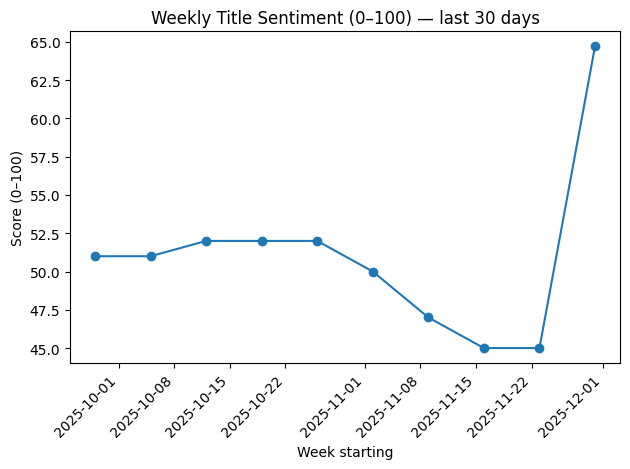

In [ ]:
plt.figure()
plt.plot(weekly["week_start"], weekly["weekly_score_0_100"], marker="o")
plt.title("Weekly Title Sentiment (0–100) — last 30 days")
plt.xlabel("Week starting")
plt.ylabel("Score (0–100)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Summarize the weekly news articles

In [ ]:
!pip install transformers sentencepiece


In [ ]:


summarizer = pipeline(
    "summarization",
    model="facebook/bart-large-cnn"
)


In [ ]:
# clean the news articles
def clean_text(text):
    if not text:
        return ""
    # Normalize unicode
    text = unicodedata.normalize("NFKD", text).encode("ascii", "ignore").decode()
    # Remove invisible characters
    text = re.sub(r"[\u200b\u200c\u200d\ufeff]", "", text)
    # Clean repeated spaces
    text = re.sub(r"\s+", " ", text)
    return text.strip()

# summarizer model
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

def summarize_week_local(headlines, mean_sentiment, count):
    # Clean headlines and remove empty ones
    cleaned = [clean_text(h) for h in headlines]
    cleaned = [h for h in cleaned if len(h) > 2]  # remove too short headlines
    # Join into a single text
    text = ". ".join(cleaned)
    # Truncate to max safe length for BART tokenizer (~1024 tokens)
    if len(text) > 3000:
        text = text[:3000]
    # Summarize
    summary = summarizer(text, max_length=120, min_length=40, do_sample=False)[0]["summary_text"]
    # Add sentiment info
    sentiment_desc = "positive" if mean_sentiment >= 0.2 else "negative" if mean_sentiment <= -0.2 else "neutral"
    full_summary = f"{summary}\nArticles this week: {count}. Sentiment: {sentiment_desc} ({mean_sentiment:.3f})."
    return full_summary


In [ ]:
weekly_summaries = []
for _, row in weekly.iterrows():
    ws = row["week_start"]
    window_start = row["window_start"]
    window_end = row["window_end"]

    mask = (df_sent["published_dt"] >= window_start) & (df_sent["published_dt"] <= window_end)
    block = df_sent.loc[mask]

    headlines = block["title"].tolist()

    summary = summarize_week_local(
        headlines=headlines,
        mean_sentiment=row["weekly_score_mean"],
        count=row["articles_count"]
    )

    weekly_summaries.append({
        "week_start": ws,
        "articles_count": row["articles_count"],
        "mean_sentiment": row["weekly_score_mean"],
        "summary": summary
    })

weekly_summary_df = pd.DataFrame(weekly_summaries)
weekly_summary_df


In [ ]:
#download df of the weekly summary of the news articles
weekly_summary_df.to_csv('advocacy_weekly_summary.csv', index=False)
files.download("advocacy_weekly_summary.csv")

In [ ]:
weekly

### Advocacy Validate Sentiment Model
Used a similar labeled financial news headline dataset on the model and it got 99% accuracy.

In [ ]:
"""
%%bigquery news --project trendle-469110
SELECT * FROM `trendle-469110.brand_health_data.news`
"""

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
news = news[1:].reset_index()
news = news.rename(columns = {'string_field_1': 'title', 'string_field_2': 'word_label'})
news = news[['title', 'word_label']]

###Try best roberta model from the perceptions bucket

In [ ]:


#best model for financial news data to find sentiment
MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

pipe = TextClassificationPipeline(
    model=model,
    tokenizer=tokenizer,
    return_all_scores=True,
    truncation=True,
    max_length=128
)

def to_row_threshold(scores, pos_thresh=0.35, neg_thresh=0.35):
    d = {s["label"].lower(): s["score"] for s in scores}
    neg = d.get("negative", 0.0)
    neu = d.get("neutral", 0.0)
    pos = d.get("positive", 0.0)

    if pos > pos_thresh:
        label = "positive"
    elif neg > neg_thresh:
        label = "negative"
    else:
        label = "neutral"

    numeric = {"negative": -1, "neutral": 0, "positive": 1}[label]

    return pd.Series({
        "sentiment_label": label,
        "sentiment_numeric": numeric,
        "prob_neg": neg,
        "prob_neu": neu,
        "prob_pos": pos
    })

scores = pipe(news["title"].astype(str).tolist(), batch_size=32)
sent_df = pd.DataFrame([to_row_threshold(s) for s in scores])
df_sent = pd.concat([news.reset_index(drop=True), sent_df], axis=1)
df_sent['match'] = df_sent['word_label'] == df_sent['sentiment_label']
df_sent['match'].value_counts()
#99% accuracy


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_al

,count
match,
True,2593
False,860


###Try model for financial news

In [ ]:


#best model for financial news data to find sentiment
MODEL = "ProsusAI/finbert"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

pipe = TextClassificationPipeline(
    model=model,
    tokenizer=tokenizer,
    return_all_scores=True,
    truncation=True,
    max_length=128
)

def to_row_threshold(scores, pos_thresh=0.35, neg_thresh=0.35):
    d = {s["label"].lower(): s["score"] for s in scores}
    neg = d.get("negative", 0.0)
    neu = d.get("neutral", 0.0)
    pos = d.get("positive", 0.0)

    if pos > pos_thresh:
        label = "positive"
    elif neg > neg_thresh:
        label = "negative"
    else:
        label = "neutral"

    numeric = {"negative": -1, "neutral": 0, "positive": 1}[label]

    return pd.Series({
        "sentiment_label": label,
        "sentiment_numeric": numeric,
        "prob_neg": neg,
        "prob_neu": neu,
        "prob_pos": pos
    })

scores = pipe(news["title"].astype(str).tolist(), batch_size=32)
sent_df = pd.DataFrame([to_row_threshold(s) for s in scores])
df_sent = pd.concat([news.reset_index(drop=True), sent_df], axis=1)
df_sent['match'] = df_sent['word_label'] == df_sent['sentiment_label']
df_sent['match'].value_counts()
#99% accuracy


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


,count
match,
True,3219
False,234


###Try a mix of roberta for financial news (best) roberta-large-financial-news-sentiment-en

In [ ]:


#best model for financial news data to find sentiment
MODEL = "Jean-Baptiste/roberta-large-financial-news-sentiment-en"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

pipe = TextClassificationPipeline(
    model=model,
    tokenizer=tokenizer,
    return_all_scores=True,
    truncation=True,
    max_length=128
)

def to_row_threshold(scores, pos_thresh=0.35, neg_thresh=0.35):
    d = {s["label"].lower(): s["score"] for s in scores}
    neg = d.get("negative", 0.0)
    neu = d.get("neutral", 0.0)
    pos = d.get("positive", 0.0)

    if pos > pos_thresh:
        label = "positive"
    elif neg > neg_thresh:
        label = "negative"
    else:
        label = "neutral"

    numeric = {"negative": -1, "neutral": 0, "positive": 1}[label]

    return pd.Series({
        "sentiment_label": label,
        "sentiment_numeric": numeric,
        "prob_neg": neg,
        "prob_neu": neu,
        "prob_pos": pos
    })

scores = pipe(news["title"].astype(str).tolist(), batch_size=32)
sent_df = pd.DataFrame([to_row_threshold(s) for s in scores])
df_sent = pd.concat([news.reset_index(drop=True), sent_df], axis=1)
df_sent['match'] = df_sent['word_label'] == df_sent['sentiment_label']
df_sent['match'].value_counts()
#99% accuracy


### Combination Score: Weekly Index

### If you already have the bucket csvs, please insert them here how you would either through pandas or using Big Query

In [ ]:
"""
pd.read_csv("awareness_data.csv")
#really called sentiment_roberta_totals_nov_16
pd.read_csv("sentiment_data.csv")
pd.read_csv("engagment_data.csv")
#advocacy
weekly = pd.read_csv("advocacy_data.csv")
"""

In [ ]:
"""
%%bigquery sentiment --project trendle-469110
SELECT * FROM `trendle-469110.brand_health_data.sentiment_roberta_totals_Dec 07`
"""

In [ ]:
"""
%%bigquery engagement --project trendle-469110
SELECT * FROM `trendle-469110.brand_health_data.engagement_Sep 28_Dec 07`
"""

In [ ]:
"""
%%bigquery regional_awareness --project trendle-469110
SELECT * FROM `trendle-469110.brand_health_data.awareness_regional_Sep 28_Dec 07`
"""

In [ ]:
"""
%%bigquery awareness --project trendle-469110
SELECT * FROM `trendle-469110.brand_health_data.awareness_top_Sep 28_Dec 07`
"""

In [ ]:
"""
%%bigquery advocacy --project trendle-469110
SELECT * FROM `trendle-469110.brand_health_data.advocacy_Sep 28_Dec 07`
"""

In [ ]:
weekly_sentiment

,ts_event,total_tweets,positive_tweets,neutral_tweets,negative_tweets,sentiment_score,day_time,date,score,v_conf,weekly_score_0_100
0,2025-12-07 00:00:00+00:00,26,3,14,9,0.115385,2025-12-07 00:00:00+00:00,2025-12-07,11.538462,0.140921,50.813008
1,2025-09-28 00:00:00+00:00,49,17,21,11,0.346939,2025-09-28 00:00:00+00:00,2025-09-28,34.693878,0.265583,54.607046
2,2025-11-30 00:00:00+00:00,42,10,18,14,0.238095,2025-11-30 00:00:00+00:00,2025-11-30,23.809524,0.227642,52.710027
3,2025-10-05 00:00:00+00:00,112,16,80,16,0.142857,2025-10-05 00:00:00+00:00,2025-10-05,14.285714,0.607046,54.336043
4,2025-11-23 00:00:00+00:00,56,6,34,16,0.107143,2025-11-23 00:00:00+00:00,2025-11-23,10.714286,0.303523,51.626016
5,2025-11-16 00:00:00+00:00,70,6,40,24,0.085714,2025-11-16 00:00:00+00:00,2025-11-16,8.571429,0.379404,51.626016
6,2025-11-02 00:00:00+00:00,82,20,27,35,0.243902,2025-11-02 00:00:00+00:00,2025-11-02,24.390244,0.444444,55.420054
7,2025-10-19 00:00:00+00:00,167,18,108,41,0.107784,2025-10-19 00:00:00+00:00,2025-10-19,10.778443,0.905149,54.878049
8,2025-10-26 00:00:00+00:00,149,35,71,43,0.234899,2025-10-26 00:00:00+00:00,2025-10-26,23.489933,0.807588,59.485095
9,2025-11-09 00:00:00+00:00,131,17,65,49,0.129771,2025-11-09 00:00:00+00:00,2025-11-09,12.977099,0.710027,54.607046


In [ ]:
#sentiment = weekly_sentiment[['date', 'score', 'weekly_score_0_100']]
#sentiment = sentiment.rename(columns = {'score': 'sentiment', 'weekly_score_0_100': 'volume_sentiment'})

In [ ]:
engagement

,date,engagement
4,2025-09-28,21.0
9,2025-10-05,10.0
14,2025-10-12,9.0
19,2025-10-19,10.0
24,2025-10-26,19.0
29,2025-11-02,21.0
34,2025-11-09,20.0
39,2025-11-16,13.0
43,2025-11-23,5.0


In [ ]:
#awareness['date'] = pd.to_datetime(awareness['date'])
#regional_awareness['date'] = pd.to_datetime(regional_awareness['date'])

In [ ]:
#make all the time uniform in date time format
#sentiment['date'] = pd.to_datetime(sentiment['date'])
#engagement['date'] = pd.to_datetime(engagement['date'])
#advocacy['date'] = pd.to_datetime(advocacy['date'])
weight = 0.25

#combine all the category datasets
scores_df = pd.merge(awareness, regional_awareness, on='date', how='outer')
scores_df = pd.merge(scores_df, sentiment, on='date', how='outer')
scores_df = pd.merge(scores_df, engagement, on='date', how='outer')
scores_df = pd.merge(scores_df, advocacy, on='date', how='outer')

scores_df



In [ ]:
#combine the category scores into the weekly overall score
scores_df = scores_df.dropna()
scores_df['weekly_score'] = weight*scores_df['sentiment'] + weight*scores_df['engagement'].astype('float') + weight*scores_df['advocacy'] + weight*scores_df['awareness']

#This weekly score also includes the regional awareness score
scores_df['weekly_score_regional'] = weight*scores_df['sentiment'] + weight*scores_df['engagement'].astype('float') + weight*scores_df['advocacy'] + weight*((scores_df['awareness']+scores_df['regional_awareness'])/2)
#This weekly score also includes the volume of posts for the perceptions score
scores_df['weekly_score_volume'] = weight*scores_df['volume_sentiment'] + weight*scores_df['engagement']  + weight*scores_df['advocacy']  + weight*scores_df['awareness']
#This weekly score also includes the regional awareness score and the volume of posts for the perceptions score
scores_df['weekly_score_volume_regional'] = weight*scores_df['volume_sentiment'] + weight*scores_df['engagement']  + weight*scores_df['advocacy']  + weight*((scores_df['awareness']+scores_df['regional_awareness'])/2)
scores_df

In [ ]:
#download final weekly scores
scores_df['date'] = pd.to_datetime(scores_df['date'])
scores_df.to_csv(f"{min(scores_df['date']).strftime('%b %d')} to {max(scores_df['date']).strftime('%b %d')}.csv", index=False)
files.download(f"{min(scores_df['date']).strftime('%b %d')} to {max(scores_df['date']).strftime('%b %d')}.csv")

In [ ]:
#plot overall weekly scores
df = scores_df[['date', 'weekly_score']]
df = df.rename(columns = {'date': 'Week', 'weekly_score': 'Score'})
# Plot
plt.figure(figsize=(8,5))
plt.plot(df["Week"], df["Score"], marker="o", linewidth=2)
plt.title("Weekly Brand Health Index", fontsize=14)
plt.xlabel("Week")
plt.ylabel("Brand Health Index")
plt.ylim(0, 100)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()